In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId', 'Surname' ], inplace = True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True).astype(int)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [15]:
X = df.drop(columns = ['Exited'])
y= df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
!pip install tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/332.0 MB 2.6 MB/s eta 0:02:07
   ---------------------------------------- 1.3/332.0 MB 2.3 MB/s eta 0:02:22
   ---------------------------------------- 2.4/332.0 MB 3.0 MB/s eta 0:01:52
   ---------------------------------------- 3.4/332.0 MB 3.5 MB/s eta 0:01:33
    --------------------------------------- 4.5/332.0 MB 3.9 MB/s eta 0:01:25
    --------------------------------------- 6.6/332.0 MB 4.8 MB/s eta 0:01:09
    --------------------------------------- 8.1/332.0 MB 5.1 MB/s eta 0:01:04
   - -------------------------------------- 8.9/332.0 MB 5.1 MB/s eta 0:01:04
   - -------------------------------------- 9.4/332.0 MB 4.7 MB/s eta 0:01:10
   - -------------------------------------- 9.7/332.0 MB 4.5 MB/s eta 0:01:12
   - -------------------------------------- 10.2/332.0 MB 4.2 MB/s eta 0:01:17

C:\Users\LAPTOP\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [37]:
model = Sequential()

model.add(Dense(11,activation='relu', input_dim =11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

C:\Users\LAPTOP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [40]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7011 - loss: 0.5946 - val_accuracy: 0.7975 - val_loss: 0.5028
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7972 - loss: 0.4827 - val_accuracy: 0.7975 - val_loss: 0.4632
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7970 - loss: 0.4484 - val_accuracy: 0.8019 - val_loss: 0.4366
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8105 - loss: 0.4269 - val_accuracy: 0.8125 - val_loss: 0.4175
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8220 - loss: 0.4120 - val_accuracy: 0.8250 - val_loss: 0.4015
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8278 - loss: 0.3985 - val_accuracy: 0.8325 - val_loss: 0.3850
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8389 - loss: 0.3835 - val_accuracy: 0.8462 - val_loss: 0.3692
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8475 - loss: 0.3707 - val_accu

In [33]:
model.layers[1].get_weights()

[array([[ 0.34740722,  0.27116683,  0.09501039,  0.17419495, -0.4939487 ,
         -0.6041208 ,  0.40343845,  0.05134832,  0.25738925, -0.01009974,
         -0.39908653],
        [ 0.02138571, -0.59324044, -0.23320481,  0.34493694,  0.42597014,
          0.7173757 , -0.40205175,  0.3354617 ,  0.3638732 , -0.01229083,
         -0.6605691 ],
        [-0.06646314,  0.17413491, -0.148956  ,  0.5495998 , -0.04112367,
          0.78128964,  0.5032685 , -0.14513409, -0.26149493, -0.22824597,
          0.8744219 ],
        [ 0.44054294,  0.13576642, -0.39274454,  0.11159982,  0.5416147 ,
         -0.31286737, -0.14007425,  0.08272859,  0.3646012 , -0.13384026,
          0.4510987 ],
        [-0.03265301,  0.15971741, -0.4741906 , -0.10644468, -0.22840644,
         -0.2656427 , -0.14981282,  0.85868704,  0.50590736, -0.08553494,
         -0.64672303],
        [-0.4915564 , -0.85680705, -0.15007392,  0.45293754, -0.44489262,
         -0.62821424,  0.58266926, -0.39788067, -0.39652038,  0.3112331

In [34]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [35]:
y_pred = np.where(y_log>0.5,1,0)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.864

In [41]:
import matplotlib.pyplot as plt


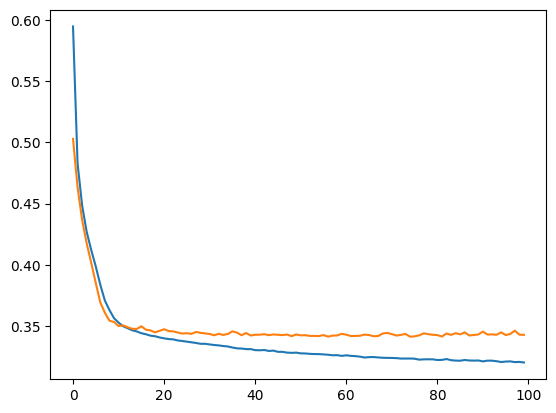

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

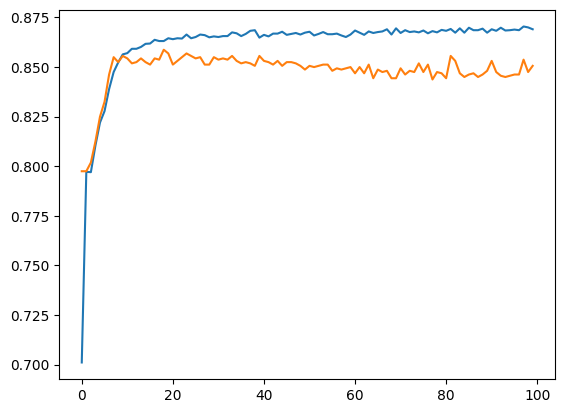

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])